Importing Libraries and Datasets


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Datasets/News.csv", index_col=0)
data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


Data preprocessing


In [3]:
data.shape

(44919, 5)

In [4]:
data = data.drop(["title", "subject", "date"], axis=1)

In [5]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [6]:
# Shuffling
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)

<Axes: xlabel='class', ylabel='count'>

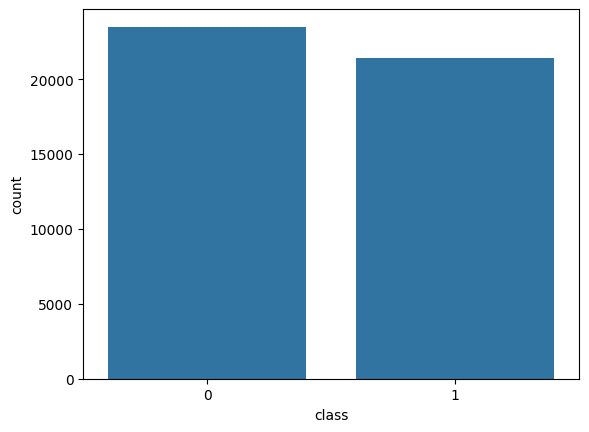

In [7]:
sns.countplot(data=data, x="class", order=data["class"].value_counts().index)

Preprocessing and analysis of News column


In [8]:
from tqdm import tqdm
import re
import nltk

nltk.download("punkt")
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        sentence = re.sub(r"[^\w\s]", "", sentence)
        preprocessed_text.append(
            " ".join(
                token.lower()
                for token in str(sentence).split()
                if token not in stopwords.words("english")
            )
        )

    return preprocessed_text

In [10]:
preprocessed_review = preprocess_text(data["text"].values)
data["text"] = preprocessed_review

 22%|██▏       | 9697/44919 [05:22<19:31, 30.07it/s]  


KeyboardInterrupt: 

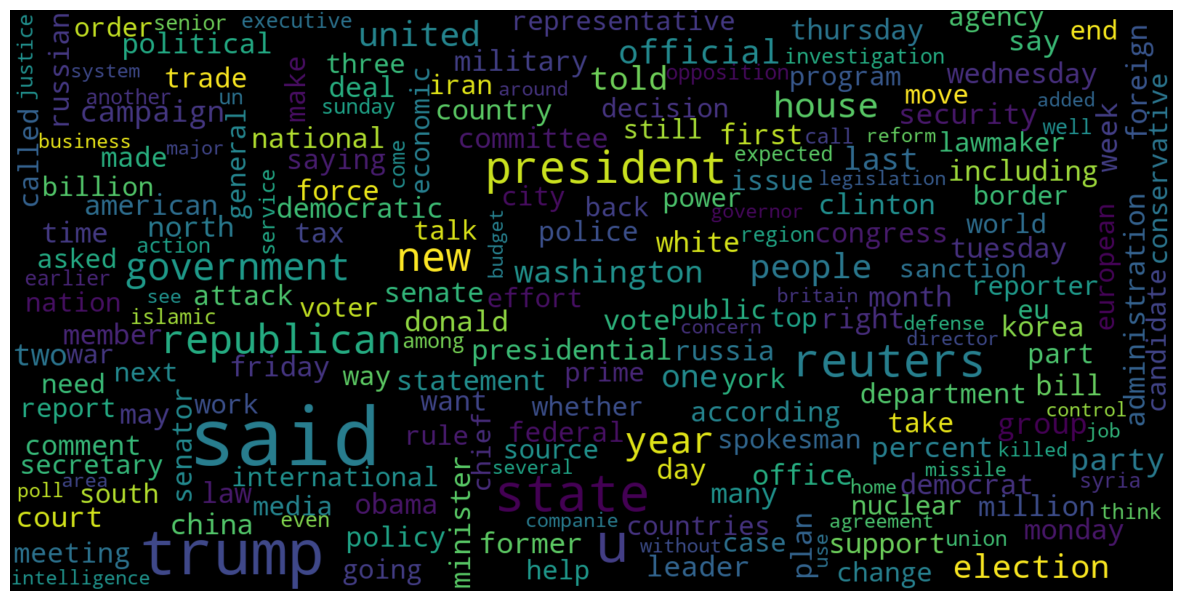

In [ ]:
# Real
consolidated = " ".join(word for word in data["text"][data["class"] == 1].astype(str))
wordCloud = WordCloud(
    width=1600, height=800, random_state=21, max_font_size=110, collocations=False
)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation="bilinear")
plt.axis("off")
plt.show()

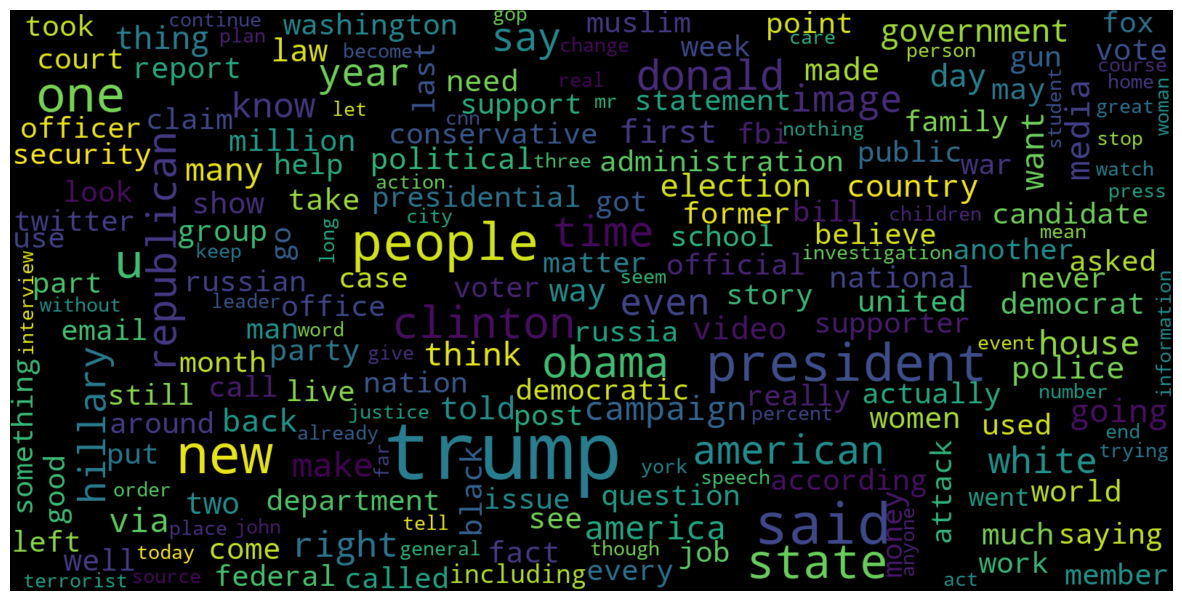

In [ ]:
# Fake
consolidated = " ".join(word for word in data["text"][data["class"] == 0].astype(str))
wordCloud = WordCloud(
    width=1600, height=800, random_state=21, max_font_size=110, collocations=False
)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation="bilinear")
plt.axis("off")
plt.show()

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

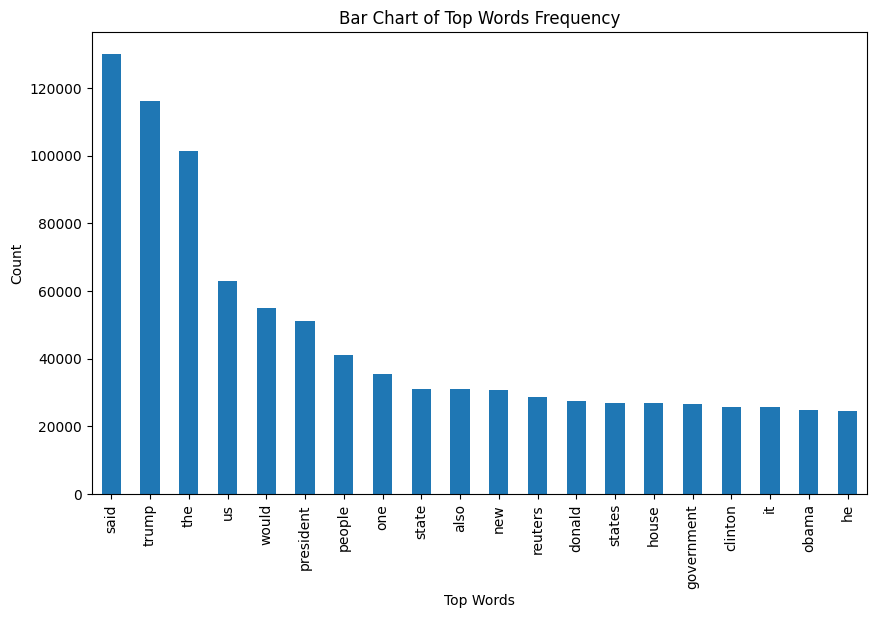

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(data["text"], 20)
df1 = pd.DataFrame(common_words, columns=["Review", "count"])

df1.groupby("Review").sum()["count"].sort_values(ascending=False).plot(
    kind="bar",
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency",
)

Converting text into Vectors


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


x_train, x_test, y_train, y_test = train_test_split(
    data["text"], data["class"], test_size=0.25
)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

Model training, Evaluation, and Prediction


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9940039775594408
0.9902048085485308


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9999703167205913
0.996260017809439


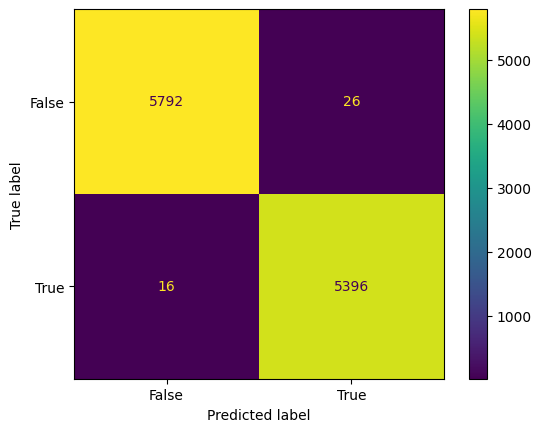

In [ ]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=[False, True]
)

cm_display.plot()
plt.show()